In [1]:
!pip install librosa

Processing /home/jovyan/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb/librosa-0.8.0-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/a0/18/0a/8ad18a597d8333a142c9789338a96a6208f1198d290ece356c/resampy-0.2.2-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/cd/85/04/704a589ef8773d1ec1393c4b271a023f929d85ef5317b12d8c/audioread-2.1.8-py3-none-any.whl
  Using cached SoundFile-0.10.3.post1-py2.py3-none-any.whl (21 kB)
  Using cached pooch-1.1.1-py3-none-any.whl (45 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import csv
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path
import sys
import pandas as pd
%matplotlib inline

In [2]:
DATAROOT = Path('./humansound') ## Set folder of your copy
df = pd.read_csv(DATAROOT/'metadata/human_sound_dataset.csv')
folds = list(set(df.fold))
print(folds)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


1
['2MinsSoundAhjeongSeo-1-1.wav', '2MinsSoundAhjeongSeo', '0', '4000', '0', '0', '1', '1', '2MinsSoundAhjeongSeo']
humansound/spectrograms_mel/2MinsSoundAhjeongSeo
mel
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-1.wav.jpg
humansound/spectrograms_raw/2MinsSoundAhjeongSeo
raw
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-1.wav.jpg
2
['2MinsSoundAhjeongSeo-1-2.wav', '2MinsSoundAhjeongSeo', '500.0', '4500.0', '0', '0', '1', '1', '2MinsSoundAhjeongSeo']
humansound/spectrograms_mel/2MinsSoundAhjeongSeo
mel
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-2.wav.jpg
humansound/spectrograms_raw/2MinsSoundAhjeongSeo
raw
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-2.wav.jpg
3
['2MinsSoundAhjeongSeo-1-3.wav', '2MinsSoundAhjeongSeo', '1000.0', '5000.0', '0', '0', '1', '1', '2MinsSoundAhjeongSeo']
humansound/spectrograms_mel/2MinsSoundAhjeongSeo
mel
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-3.wav.jpg
humansound/spectrograms_raw/2MinsSoundAhjeongSeo
raw
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-3.wav.j

mel
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-25.wav.jpg
humansound/spectrograms_raw/2MinsSoundAhjeongSeo
raw
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-25.wav.jpg
26
['2MinsSoundAhjeongSeo-1-26.wav', '2MinsSoundAhjeongSeo', '12500.0', '16500.0', '0', '0', '1', '1', '2MinsSoundAhjeongSeo']
humansound/spectrograms_mel/2MinsSoundAhjeongSeo
mel
2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-26.wav.jpg
humansound/spectrograms_raw/2MinsSoundAhjeongSeo


KeyboardInterrupt: 

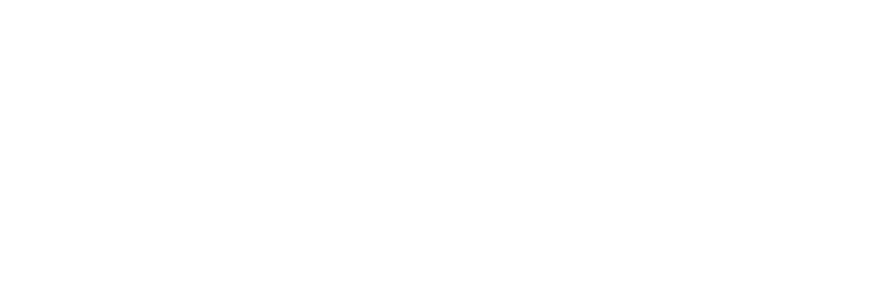

In [3]:
'''
import os
# Convert Wav to Image

def create_mel_spect(y, sr, label, wav_name): # Create a mel-scaled spectrogram

    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    image_dir = os.path.join(DATAROOT,'spectrograms_mel')
    wav_name = Path(wav_name).resolve().stem
    plt.savefig(image_dir + '/' + label  + '/' + wav_name + '.jpg')
    plt.close()

def create_raw_spect(y,label, wav_name):  # Create a raw spectrogram
    log_S = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(log_S, y_axis='linear')
    image_dir = os.path.join(DATAROOT,'spectrograms_raw')
    wav_name = Path(wav_name).resolve().stem
    plt.savefig(image_dir + '/' + label + '/' + wav_name + '.jpg')
    plt.close()

def set_fig():    # Set figure properties

    fig = plt.figure(figsize=(12, 4))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
def create_spect_by_file_type(wav_file, spec_type, label, file_name):

    y, sr = librosa.load(wav_file)
    set_fig()
    if spec_type == 'mel':
        create_mel_spect(y, sr, label, file_name)
    elif spec_type == 'raw':
        create_raw_spect(y, label, file_name)
    print(spec_type + '\n' + label + '/' + file_name + '.jpg')


def createSpectrograms(spec_types):
    matadate_file = os.path.join(DATAROOT,'metadata','human_sound_dataset.csv')
    with open(matadate_file) as csvfile:
        meta_reader = csv.reader(csvfile, delimiter=',')
        print(meta_reader)
        for idx, row in enumerate(meta_reader):
            if idx == 0: # Ignore headers
                continue
            print(idx)
            print(row)
            file_name = row[0]
            fold = row[6]
            label = row[8]
            wav_file = os.path.join(DATAROOT,'audio','fold'+ fold, file_name)
            for spec_type in spec_types:
                dir_name = os.path.join(DATAROOT,'spectrograms_' + spec_type, label)
                if not os.path.exists(dir_name):
                    os.makedirs(dir_name)
                print(dir_name)
                create_spect_by_file_type(wav_file, spec_type, label, file_name)
    
createSpectrograms(['mel', 'raw'])
'''

# Train sound model

Change input shape dimensions for fine-tuning

In [6]:
!pip install opencv-python

In [7]:
!pip install imutils

In [15]:
import cv2
from imutils import paths

def set_lable_data(base_dir):
    data = []
    labels = []
    class_to_idx = 0
    classes = {}
    for f in sorted(os.listdir(base_dir)):
        if f.startswith('.'):
            continue
        print(base_dir+f)
        
        classes[class_to_idx]=f
        class_to_idx += 1
        #print(classes)
        if os.path.isdir(base_dir+f):
            print(f"{f} is a target class")
            imagePaths = list(paths.list_images(base_dir+f))         
            for imagePath in imagePaths:
                print(f"{imagePath}")
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (128, 128))
                #print(image)
                #print(f)
                data.append(image)
                labels.append(f)
    return data,labels,classes

data, labels, classes = set_lable_data('humansound/spectrograms_mel/')
'''
def find_classes(dir):   # Finds the class folders in a dataset, dir (string): Root directory path.

        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        #classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx
'''

#print(data.shape,labels.shape,classes.shape)
'''
# loop over the image paths
imagePaths = list(paths.list_images('urbansound8k/spectrograms_mel'))

for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    #print(label)
    # load the image, swap color channels, and resize it to be a fixed
    # 128x128 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    print(image)
    print(label)
    data.append(image)
    labels.append(label)
'''




humansound/spectrograms_mel/2MinsSoundAhjeongSeo
2MinsSoundAhjeongSeo is a target class
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-29.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundAhjeongSeo/2MinsSoundAhjeongSeo-1-50.wav.jpg
h

humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-44.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-56.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-59.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-35.wav.jpg
humansound/spectrograms_mel/2MinsSoundBongJunLee/2MinsSoundBongJunLee-3-16.wav.jpg
humans

humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-29.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-61.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-25.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSoundBumhoSon-5-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundBumhoSon/2MinsSou

humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-58.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-20.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-27.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHunShin-6-66.wav.jpg
humansound/spectrograms_mel/2MinsSoundChaeHunShin/2MinsSoundChaeHun

humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-66.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-42.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-50.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-58.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-82.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongHwanJang/2MinsSoundDongHwanJang-8-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongH

humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-63.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-24.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-53.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-7.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-43.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsME-9-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundDongWookKim-2SoftRoticsME/2MinsSoundDongWookKim-2SoftRoticsM

humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-7.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-53.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHoKim/2MinsSoundGeeHoKim-11-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundGeeHo

humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-29.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-24.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-42.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-11.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-43.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-27.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-10.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-13-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundHokiKim/2MinsSoundHokiKim-1

humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-56.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-60.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-54.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseokDo/2MinsSoundHoseokDo-15-43.wav.jpg
humansound/spectrograms_mel/2MinsSoundHoseo

humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-70.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-73.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-66.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-42.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2MinsSoundHyunJunChoi-17-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundHyunJunChoi/2Mins

humansound/spectrograms_mel/2MinsSoundHyungJinKim/2MinsSoundHyungJinKim-19-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon
2MinsSoundIlJaeKwon is a target class
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-11.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-33.wav.jpg
humansound/spectrograms_mel/2MinsSoundIlJaeKwon/2MinsSoundIlJaeKwon-20-34.wav.jpg
humansound/

humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-15.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-20.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundJCPark/2MinsSoundJCPark-22-24.wav.jpg
humansound/spect

humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-60.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-54.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-63.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-62.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-58.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-35.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-25.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeHaKim/2MinsSoundJaeHaKim-24-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeH

humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-38.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-39.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-25.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaeYooPark/2MinsSoundJaeYooPark-26-45.wav

humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-50.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-11.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-44.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-42.wav.jpg
humansound/spectrograms_mel/2MinsSoundJaewoongShim/2MinsSoundJaewoongShim-28-46.wav.jpg
humansound/spectrograms_mel/2MinsS

humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-10.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-35.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2MinsSoundJongHyunLee-30-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundJongHyunLee/2Mins

humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-64.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundJuHyeonKim/2MinsSoundJuHyeonKim-32-19.w

humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-55.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-20.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-10.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-7.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-27.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-24.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHaKim/2MinsSoundJunHaKim-34-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundJunHa

humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-29.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-44.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-33.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-15.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-25.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundKibeomKim/2MinsSoundKibeomKim-36-23.wav.jpg
humansound/spectrog

humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-32.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-13.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-54.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeVanDuc/2MinsSoundLeVanDuc-38-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundLeV

humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-10.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-56.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-39.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-58.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSoundMinChangKim-40-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinChangKim/2MinsSou

humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-53.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-40.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-17.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-44.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-61.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-50.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundMinjiKim/2MinsSoundMinjiKim-42-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundMi

humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-43.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-28.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-55.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-51.wav.jpg
humansound/spectrograms_mel/2MinsSoundSangHyeokChu/2MinsSoundSangHyeokChu-44-9.wav.jpg
humansound/spectrograms_mel/2MinsS

humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-59.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-54.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-44.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-69.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-36.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-15.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-67.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSoundSeongukSeo20721-46-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeongukSeo20721/2MinsSou

humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-74.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-11.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-49.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-76.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-69.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-8.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeulKiPark/2MinsSoundSeulKiPark-47-29.wa

humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-66.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-10.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-68.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundSeungUYoo/2MinsSoundSeungUYoo-49-22.wav.jpg
humansound/spectr

humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-53.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-20.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-27.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-35.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-15.wav.jpg
humansound/spectrograms_mel/2MinsSoundSunohKim/2MinsSoundSunohKim-51-49.wav.jpg
humansound/spectrograms_mel/2MinsSoundSun

humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-42.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-26.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-38.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-43.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-15.wav.jpg
humansound/spectrograms_mel/2MinsSoundTaeGyunAhn/2MinsSoundTaeGyunAhn-53-51.wav

humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-39.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-16.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-37.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-34.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-38.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-49.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-33.wav.jpg
humansound/spectrograms_mel/2MinsSoundToHaiThien/2MinsSoundToHaiThien-56-17.w

humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-45.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-52.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-18.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-22.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-9.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-4.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundWooSukChoi/2MinsSoundWooSukChoi-58-49.wav.

humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-3.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-69.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-64.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-30.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-73.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-60.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-23.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-1.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-61.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-57.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-58.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongMoKim/2MinsSoundYeongMoKim-60-36.wa

humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-49.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-48.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-21.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-12.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-54.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-11.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundYeongTakOh/2MinsSoundYeongTakOh-61-24.wav.jpg
humansound/spectrograms_mel/2MinsSoundYongWookKim
2MinsSoundYongWookKim is a target class
humansound/spectrograms_mel/2MinsSoundYongWookKim/2MinsSoundYongWookKim-62-47.wav.jpg
humansound/spectrograms_mel/2MinsSoundYongWookKim/2MinsSoundYongWook

humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-5.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-31.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-25.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-2.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-27.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-6.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-46.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-14.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-50.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-41.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSoundYoungBinKim-64-19.wav.jpg
humansound/spectrograms_mel/2MinsSoundYoungBinKim/2MinsSo

humansound/spectrograms_mel/2MinsSound김재인/2MinsSound김재인-65-55.wav.jpg
humansound/spectrograms_mel/2MinsSound김재인/2MinsSound김재인-65-47.wav.jpg
humansound/spectrograms_mel/2MinsSound김재인/2MinsSound김재인-65-26.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환
2MinsSound김지환 is a target class
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-43.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-13.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-48.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-19.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-17.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-52.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-50.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-31.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-41.wav.jpg
humansound/spectrograms_mel/2MinsSound김지환/2MinsSound김지환-66-12.wav.jpg
humansound/spect

humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-36.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-48.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-18.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-2.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-21.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-63.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-46.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-11.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-52.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-37.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-31.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-12.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-1.wav.jpg
humansound/spectrograms_mel/2MinsSound최은태/2MinsSound최은태-68-19.wav.jpg
humansound/spectrogram

humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-36.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-29.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-55.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-37.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-22.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-33.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-27.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-48.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-17.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-45.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-2.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-10.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-30.wav.jpg
humansound/spectrograms_mel/2MinsSound홍채은/2MinsSound홍채은-70-40.wav.jpg
humansound/spectrogra

"\n# loop over the image paths\nimagePaths = list(paths.list_images('urbansound8k/spectrograms_mel'))\n\nfor imagePath in imagePaths:\n    # extract the class label from the filename\n    label = imagePath.split(os.path.sep)[-2]\n    #print(label)\n    # load the image, swap color channels, and resize it to be a fixed\n    # 128x128 pixels while ignoring aspect ratio\n    image = cv2.imread(imagePath)\n    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n    image = cv2.resize(image, (128, 128))\n    print(image)\n    print(label)\n    data.append(image)\n    labels.append(label)\n"

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# convert features and corresponding classification labels into numpy arrays
X = np.array(data)
y = np.array(labels).reshape(( -1 , 1 ))

# encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

print(np.argmax(yy,axis=1))


Using TensorFlow backend.


NameError: name 'data' is not defined

In [27]:

from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(X, yy, test_size=0.25, stratify=labels, random_state=42)



In [28]:
print(trainX)
print(testX)

[[[[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0   4]]

  [[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0   4]]

  [[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0   4]]

  ...

  [[  1   1   2]
   [ 23  17  55]
   [ 18  11  51]
   ...
   [  0   0   2]
   [  1   0   5]
   [  1   0   2]]

  [[  0   0   2]
   [  2   1  14]
   [  0   0   5]
   ...
   [  0   0   6]
   [ 10   8  23]
   [  0   0   5]]

  [[  0   0   6]
   [  2   2   8]
   [  0   0   5]
   ...
   [  0   0   4]
   [  6   5  16]
   [  0   0   6]]]


 [[[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0   4]]

  [[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0   4]]

  [[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [  0   0   4]
   [  0   0   4]
   [  0   0

In [29]:
from keras.preprocessing.image import ImageDataGenerator

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean



In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
    
model = keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same',input_shape=(128,128,3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_21 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 126, 126, 64)      36928     
_________________________________________________________________
activation_22 (Activation)   (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 63, 63, 64)       

In [34]:
print("[INFO] training head...")

'''
H = model.fit(
	x=trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=100)
'''
with tf.device('/GPU:1'):
    model.fit(trainX, trainY, batch_size=64, epochs=10, validation_data=(testX, testY))


[INFO] training head...
Train on 3075 samples, validate on 1025 samples
Epoch 1/10
  64/3075 [..............................] - ETA: 11:27

InternalError: 2 root error(s) found.
  (0) Internal:  Dst tensor is not initialized.
	 [[{{node MatMul_3/_64}}]]
  (1) Internal:  Dst tensor is not initialized.
	 [[{{node MatMul_3/_64}}]]
	 [[GroupCrossDeviceControlEdges_0/Identity_2/_97]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_5281]

Function call stack:
distributed_function -> distributed_function


In [ ]:
#pip install tensorflow-gpu

In [ ]:
model_json = model.to_json()
with open("weights_spectrum.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("weights_spectrum.h5") # serialize weights to HDF5

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(testX, testY, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 6 samples")
predictions = model.predict(testX[:100])

print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)
print(classes)
'''
for i in predicted_class_indices:
    for idx,label in classes.items():
        if i == idx:
            print(label)
''' 

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    directory=r"./test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42

STEP_SIZE_TEST=len(test_generator)//32

